<h2><i><b> PYTORCH - Training on MNIST Dataset </h3>

---



CODE BLOCK: 1

### Imports <hr>

In [1]:
# Pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary
from torchsummary import summary

# Loading classes from py files
from model import Net, ModelTraining
from utils import Dataset, Utility

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Initialization

In [2]:
# creating class objects
get_data = Dataset()
get_utilitites= Utility()

model_train = ModelTraining()

CODE BLOCK: 2

##### Check device support CPU/GPU <hr> 

In [3]:
# CODE MOVED TO UTILS.PY

# CUDA?
device = Utility.set_cuda_if_available()
print(f'Device available for the script - {device}')

CUDA Available? <function is_available at 0x7f12b125d870>
Device available for the script - cuda


CODE BLOCK: 3

##### Create transforms to apply to dataset <hr>


In [4]:
# CODE MOVED TO UTILS.PY

CODE BLOCK: 4

##### Create train/test dataset with transforms <hr>

In [5]:
train_data = get_data.train_data()
test_data = get_data.test_data()

CODE BLOCK: 5

Create Batch loader for train/test dataset <hr>

In [6]:
batch_size = 256
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

In [7]:
# Analyze the first batch of 512 images
images, labels = next(iter(train_loader))
print(f'Shape of the batch - {images.shape}')
print(f'Total images in the batch - {len(labels)}')

Shape of the batch - torch.Size([256, 1, 28, 28])
Total images in the batch - 256


CODE BLOCK: 6

View sample images from the train loader 

---



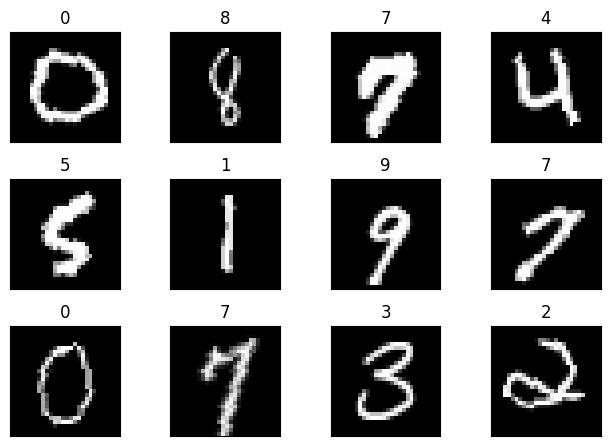

In [8]:
# CODE MOVED TO UTILS.PY

get_utilitites.plot_grid(train_loader)

CODE BLOCK: 7

Defining the Model architecture

---



In [9]:
# CODE MOVED TO MODELS.PY

# New line added for model summary
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


CODE BLOCK: 8

Declare variables

In [10]:
# variable for model and training
num_epochs = 15

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

CODE BLOCK: 9

Define the TRAIN + TEST Functions

---


In [11]:
# CODE MOVED TO MODEL.PY

CODE BLOCK: 10

Model training

---


In [12]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=11, gamma=0.1, verbose=True)

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  model_train.train(model, device, train_loader, optimizer)
  model_train.test(model, device, test_loader)
  scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.1240 Batch_id=234 Accuracy=70.06: 100%|██████████| 235/235 [00:30<00:00,  7.83it/s]


Test set: Average loss: 0.0998, Accuracy: 9692/10000 (96.92%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.2414 Batch_id=234 Accuracy=96.14: 100%|██████████| 235/235 [00:23<00:00, 10.12it/s]


Test set: Average loss: 0.0531, Accuracy: 9830/10000 (98.30%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.1000 Batch_id=234 Accuracy=97.34: 100%|██████████| 235/235 [00:23<00:00, 10.09it/s]


Test set: Average loss: 0.0471, Accuracy: 9847/10000 (98.47%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0614 Batch_id=234 Accuracy=97.87: 100%|██████████| 235/235 [00:23<00:00, 10.11it/s]


Test set: Average loss: 0.0376, Accuracy: 9879/10000 (98.79%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0286 Batch_id=234 Accuracy=98.26: 100%|██████████| 235/235 [00:24<00:00,  9.77it/s]


Test set: Average loss: 0.0365, Accuracy: 9878/10000 (98.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0444 Batch_id=234 Accuracy=98.38: 100%|██████████| 235/235 [00:23<00:00, 10.15it/s]


Test set: Average loss: 0.0278, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0161 Batch_id=234 Accuracy=98.58: 100%|██████████| 235/235 [00:23<00:00, 10.17it/s]


Test set: Average loss: 0.0293, Accuracy: 9895/10000 (98.95%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0270 Batch_id=234 Accuracy=98.62: 100%|██████████| 235/235 [00:23<00:00, 10.06it/s]


Test set: Average loss: 0.0247, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0342 Batch_id=234 Accuracy=98.84: 100%|██████████| 235/235 [00:23<00:00, 10.00it/s]


Test set: Average loss: 0.0270, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0230 Batch_id=234 Accuracy=98.95: 100%|██████████| 235/235 [00:23<00:00, 10.20it/s]


Test set: Average loss: 0.0290, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0533 Batch_id=234 Accuracy=98.91: 100%|██████████| 235/235 [00:23<00:00, 10.06it/s]


Test set: Average loss: 0.0247, Accuracy: 9918/10000 (99.18%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0182 Batch_id=234 Accuracy=99.21: 100%|██████████| 235/235 [00:23<00:00, 10.07it/s]


Test set: Average loss: 0.0194, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.0086 Batch_id=234 Accuracy=99.31: 100%|██████████| 235/235 [00:22<00:00, 10.23it/s]


Test set: Average loss: 0.0194, Accuracy: 9929/10000 (99.29%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0424 Batch_id=234 Accuracy=99.34: 100%|██████████| 235/235 [00:23<00:00, 10.14it/s]


Test set: Average loss: 0.0186, Accuracy: 9934/10000 (99.34%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0599 Batch_id=234 Accuracy=99.35: 100%|██████████| 235/235 [00:23<00:00,  9.92it/s]


Test set: Average loss: 0.0187, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-03.


CODE BLOCK: 11

Plot the Loss/Accuracy for Train/Test dataset

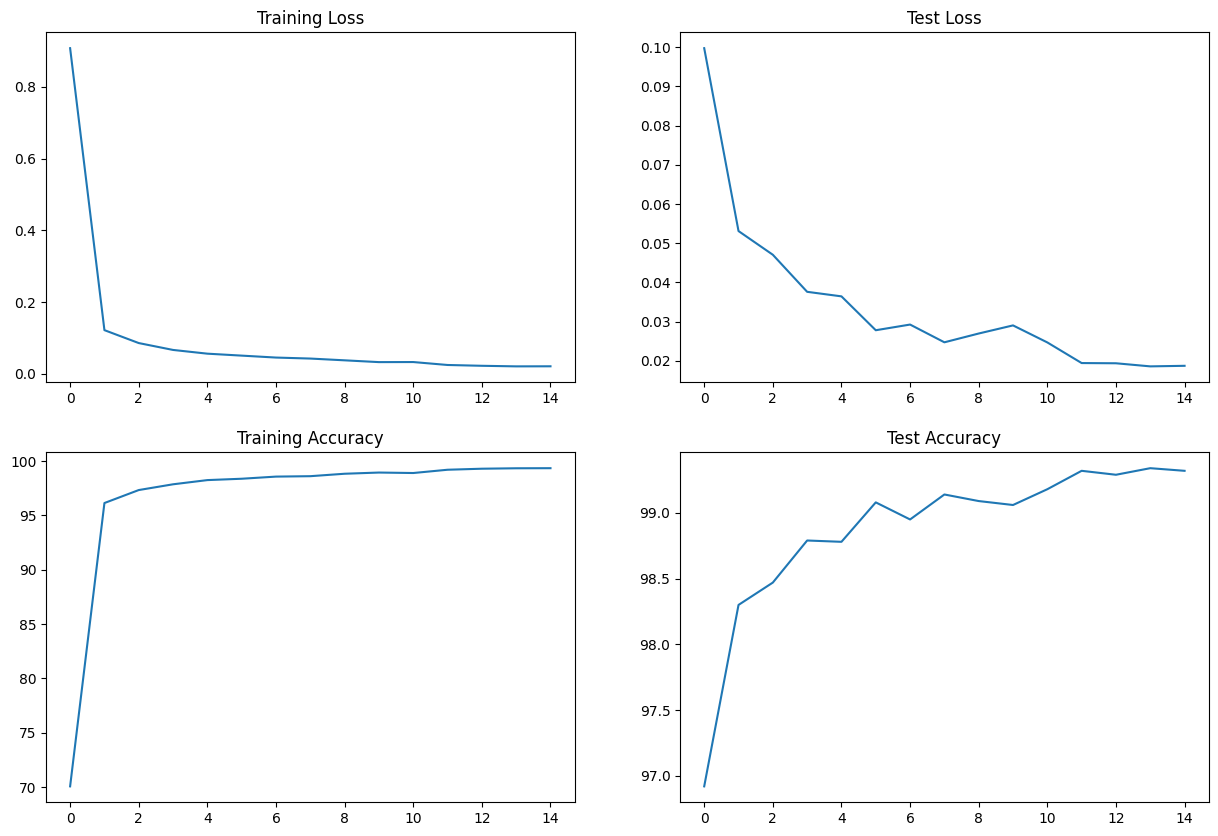

In [14]:
# CODE MOVED TO UTILS.PY

model_train.plot_loss_accuracy()